<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline

# I have created a stylesheet to define default plot behaviors. 
#This stylesheet changes the default parameters stored in the ictionary matplitlib.rcParams
pl.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2021/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


In [12]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/HW3_LinearRegression/grb050525A.csv")

In [13]:
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


In [14]:
grbAG["logtime"]  = np.log10(grbAG["time"])

In [15]:
grbAG

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098
...,...,...,...,...,...,...
114,W1,63738,NaN,21.20,1,4.804398
115,M2,74798,NaN,21.59,1,4.873890
116,U,128928,NaN,20.05,1,5.110347
117,V,971360,NaN,22.09,1,5.987380


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


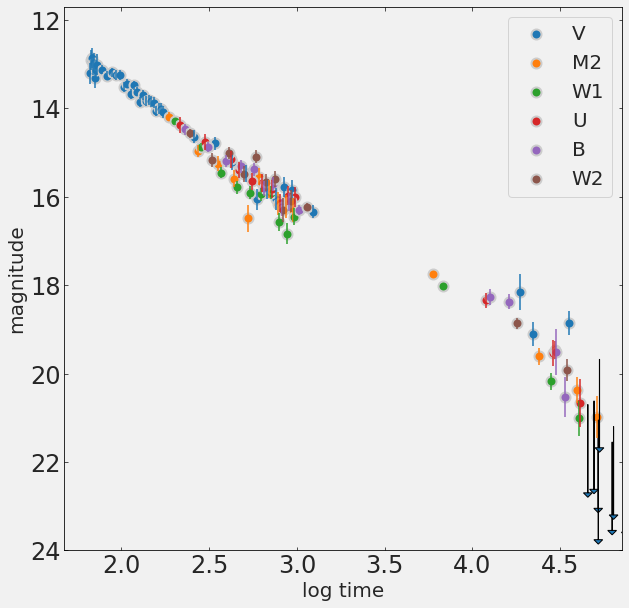

In [16]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"], 
                grbAG.loc[grbAG["filter"] == f, "mag"], 
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"], 
               grbAG.loc[grbAG["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')
    

# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, 
             grbAG.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)          
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 1: Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows.

In [17]:
X = np.c_[np.ones((len(grbAG) - grbAG.upperlimit.sum(), 1)), 
	grbAG[grbAG.upperlimit == 0].logtime]
y = grbAG.loc[grbAG.upperlimit == 0].mag

In [18]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [19]:
theta_best

array([8.58266823, 2.51199984])

In [20]:
!pip install emcee

In [21]:
import emcee

In [22]:
def log_prior(teta):
  slope, intercept = theta
  if slope > 0 and intercept > 0:
     return 0
  return -np.inf

In [23]:
def log_likelihood(theta, x, y, yerr):
  slope, intercept = theta
  return -np.sum((y - line(intercept, slope, x)**2) / yerr**2)

In [24]:
def log_probability(theta, x, y, yerr):
  lp = log_prior(theta)
  if not np.isfinite(lp):
    return -np.inf

  return lp + log_likelihood(theta, x, y, yerr)


In [25]:
ig = [10, 1]

In [31]:
#initialize walkers
nwalkers = 32
ndim = len(ig)

In [34]:
pos = np.array(ig) + 1e-4 *np.random.randn(nwalkers, ndim)

In [33]:
pos.shape

(32, 2)

In [36]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args(x, y, s))

NameError: ignored

In [ ]:
sempler.run_mcmc(pos, 5000, progress=True);